# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-28 18:00:03.570153


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/27/20


,11/27/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,13088821,264858,2.02
Brazil,6238350,171974,2.76
India,9351109,136200,1.46
Mexico,1078594,104242,9.66
United Kingdom,1593250,57648,3.62
Italy,1538217,53677,3.49
France,2248209,51999,2.31


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/27/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
54422,US,12772653,2020-11-25,262222.0,2297.0,181490.0,175809.571429
54421,US,12591163,2020-11-24,259925.0,2146.0,172935.0,174225.428571
54420,US,12418228,2020-11-23,257779.0,913.0,171462.0,172451.142857
54419,US,12246766,2020-11-22,256866.0,920.0,142734.0,170494.571429
54418,US,12104032,2020-11-21,255946.0,1429.0,178073.0,169501.857143
54417,US,11925959,2020-11-20,254517.0,1917.0,196010.0,167878.428571
54416,US,11729949,2020-11-19,252600.0,1987.0,187963.0,165243.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/27/20


,11/27/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,628375,34477.0,5.49
Texas,1207243,21693.0,1.80
California,1185576,19089.0,1.61
Florida,979020,18363.0,1.88
New Jersey,326473,16942.0,5.19
Illinois,705063,12685.0,1.80
Massachusetts,219252,10635.0,4.85


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/27/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1863,California,1160940,2020-11-25,18968.0,106.0,15731.0,13842.857143
1862,California,1145209,2020-11-24,18862.0,109.0,16990.0,13274.857143
1861,California,1128219,2020-11-23,18753.0,27.0,13695.0,12361.285714
1860,California,1114524,2020-11-22,18726.0,54.0,9089.0,11775.571429
1859,California,1105435,2020-11-21,18672.0,32.0,15685.0,11766.857143
1858,California,1089750,2020-11-20,18640.0,98.0,12576.0,10883.428571
1857,California,1077174,2020-11-19,18542.0,89.0,13134.0,10436.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/27/20


,11/27/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,387793,7604.0,1.96
Orange,75095,1577.0,2.10
Riverside,85774,1437.0,1.68
San Bernardino,90222,1129.0,1.25
San Diego,76359,996.0,1.30
Sacramento,35854,566.0,1.58
Alameda,28857,505.0,1.75


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/27/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5906,Los Angeles,378323,2020-11-25,7543.0,46.0,4189.0,4283.857143
5905,Los Angeles,374134,2020-11-24,7497.0,51.0,3498.0,4230.142857
5904,Los Angeles,370636,2020-11-23,7446.0,8.0,6116.0,4041.857143
5903,Los Angeles,364520,2020-11-22,7438.0,41.0,2651.0,3565.714286
5902,Los Angeles,361869,2020-11-21,7397.0,1.0,4418.0,3617.142857
5901,Los Angeles,357451,2020-11-20,7396.0,33.0,4219.0,3512.285714
5900,Los Angeles,353232,2020-11-19,7363.0,28.0,4896.0,3254.571429
5899,Los Angeles,348336,2020-11-18,7335.0,36.0,3813.0,2910.285714
5898,Los Angeles,344523,2020-11-17,7299.0,24.0,2180.0,2663.857143
5897,Los Angeles,342343,2020-11-16,7275.0,6.0,2783.0,2674.000000



7 day new US cases as of 11/27/20


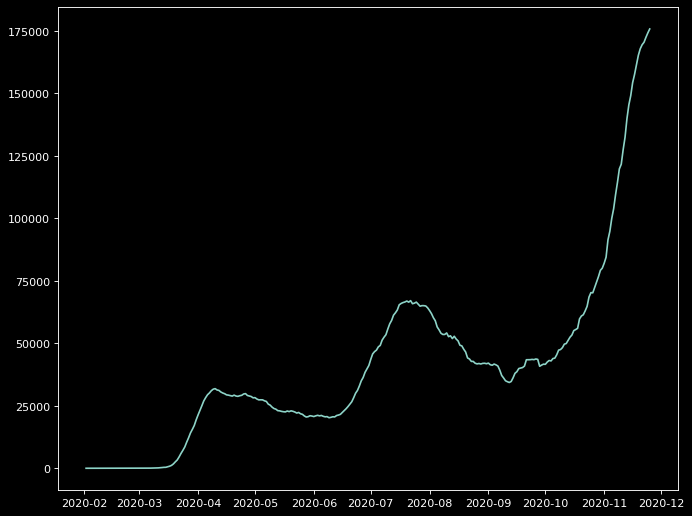

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/27/20


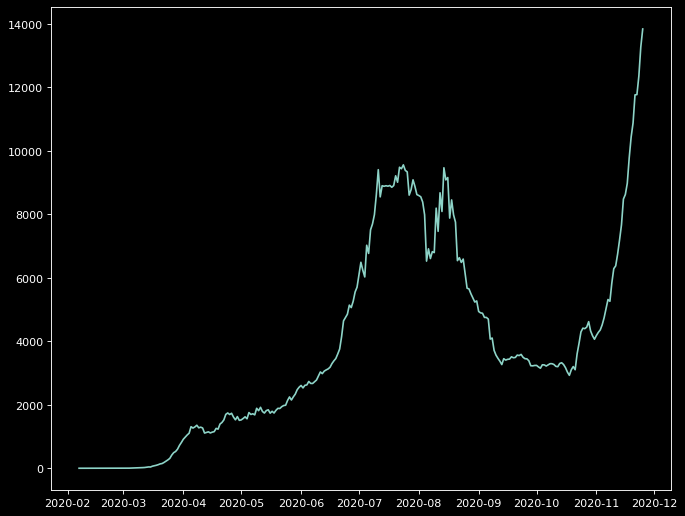

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/27/20


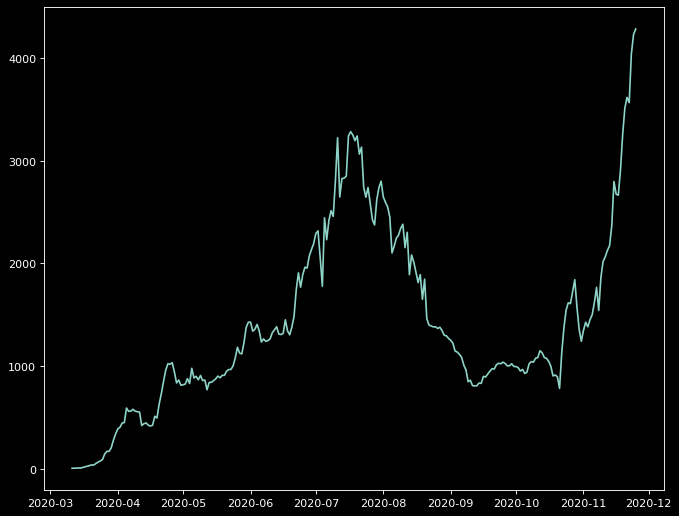

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()